In [15]:
"""
@author: pho
"""
%load_ext autoreload
%autoreload 2
import sys
import importlib

import numpy as np
import pandas as pd

## Panel:
import param
import panel as pn
from panel.viewable import Viewer

## Pho's Custom Libraries:
from pyphocorehelpers.general_helpers import PrettyPrintable, get_arguments_as_optional_dict
from pyphoplacecellanalysis.General.NeuropyPipeline import * # get_neuron_identities
from pyphoplacecellanalysis.General.SessionSelectionAndFiltering import batch_filter_session
from pyphoplacecellanalysis.General.ComputationResults import ComputationResult
# from PendingNotebookCode import estimation_session_laps

from neuropy.analyses.laps import estimation_session_laps

# Neuropy:
from neuropy.analyses.placefields import PlacefieldComputationParameters, perform_compute_placefields
from neuropy.core.neuron_identities import NeuronIdentity, build_units_colormap, PlotStringBrevityModeEnum


# def estimate_session_laps_load_function(regular_load_function, a_base_dir):
#     session = regular_load_function(a_base_dir)
#     ## Estimate the Session's Laps data using my algorithm from the loaded position data.
#     session = estimation_session_laps(session)
#     return session

# known_data_session_type_dict = {'kdiba':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.kdiba_old_format_session(a_base_dir)),
#                                basedir=Path(r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53')),
#                 'bapun':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.bapun_data_session(a_base_dir)),
#                                basedir=Path('R:\data\Bapun\Day5TwoNovel'))
#                }

known_data_session_type_dict = {'kdiba':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: estimation_session_laps(DataSessionLoader.kdiba_old_format_session(a_base_dir))),
                               basedir=Path(r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53')),
                'bapun':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.bapun_data_session(a_base_dir)),
                               basedir=Path('R:\data\Bapun\Day5TwoNovel'))
               }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
curr_bapun_pipeline = NeuropyPipeline(name='bapun_pipeline', session_data_type='bapun', basedir=known_data_session_type_dict['bapun'].basedir, load_function=known_data_session_type_dict['bapun'].load_function)
curr_bapun_pipeline.is_loaded
size_bytes = curr_bapun_pipeline.sess.__sizeof__() # 1753723032
f'object size: {size_bytes/(1024*1024)} MB'

basedir is already Path object.
	 basepath: R:\data\Bapun\Day5TwoNovel
	 session_name: RatS-Day5TwoNovel-2020-12-04_07-55-09
converting neuron_type strings to core.neurons.NeuronType objects...
	 done.
Position falling back to legacy loading protocol...: dict_rep: {'traces': array([[-50.946354, -50.946354, -50.946354, ..., -45.350155, -45.350155,
        -45.350155],
       [-50.646282, -50.646282, -50.646282, ...,  64.150757,  64.150757,
         64.150757],
       [  7.124897,   7.124897,   7.124897, ...,   5.571329,   5.571329,
          5.571329]]), 'computed_traces': array([[nan, nan, nan, ..., nan, nan, nan]]), 't_start': 0, 'sampling_rate': 60, 'metadata': None}
linearized position loaded from file.
Loading success: .flattened.spikes.npy.
Loading success: .ripple.npy.
Loading success: .mua.npy.
Loading success: .pbe.npy.


'object size: 1672.480613708496 MB'

In [26]:
# KDiba Old Format:
## Data must be pre-processed using the MATLAB script located here: 
# R:\data\KDIBA\gor01\one\IIDataMat_Export_ToPython_2021_11_23.m
# From pre-computed .mat files:
## 07: 
# basedir = r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53'
# # ## 08:
# basedir = r'R:\data\KDIBA\gor01\one\2006-6-08_14-26-15'
curr_kdiba_pipeline = NeuropyPipeline(name='kdiba_pipeline', session_data_type='kdiba', basedir=known_data_session_type_dict['kdiba'].basedir, load_function=known_data_session_type_dict['kdiba'].load_function)
# curr_bapun_pipeline
curr_kdiba_pipeline.is_loaded
size_bytes = curr_kdiba_pipeline.sess.__sizeof__() # 1753723032
f'object size: {size_bytes/(1024*1024)} MB'
# ## Estimate the Session's Laps data using my algorithm from the loaded position data.
# curr_kdiba_pipeline.sess = estimation_session_laps(curr_kdiba_pipeline.sess)
curr_kdiba_pipeline.sess.epochs

basedir is already Path object.
	 basepath: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53
	 session_name: 2006-6-07_11-26-53
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.epochs_info.mat...
done.
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position_info.mat...
done.
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.spikes.mat...
done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session...
curr_active_epoch_timeslice_indicies: Int64Index([   27,    28,    29,    30,    31,    32,    33,    34,    35,
               36,
            ...
            52139, 52140, 52141, 52142, 52143, 52144, 52145, 52146, 52147,
            52148],
           dtype='int64', length=52122)
 	 np.shape(curr_active_epoch_timeslice_indicies): (52122,)
curr_active_epoch_timeslice_indicies: Int64Index([52149, 52150, 52151, 52152, 521

C:\Users\Pho\repos\NeuroPy\neuropy\core\position.py:142: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  included_indicies = self._data['t'].between(t_start, t_stop, inclusive=True) # returns a boolean array indicating inclusion in teh current lap
C:\Users\Pho\repos\NeuroPy\neuropy\core\position.py:142: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  included_indicies = self._data['t'].between(t_start, t_stop, inclusive=True) # returns a boolean array indicating inclusion in teh current lap


2006-6-07_11-26-53.interpolated_spike_positions.npy saved
	 done.

Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.laps_info.mat...
done.
setting laps object.
session.laps loaded successfully!


         start         stop  label     duration
0     0.000000  1739.153364  maze1  1739.153364
1  1739.153364  1932.420005  maze2   193.266641

In [27]:
# Truely Common:
def _display_result(computation_result):
    pf_neuron_identities, pf_sort_ind, pf_colors, pf_colormap, pf_listed_colormap = get_neuron_identities(computation_result.computed_data['pf2D'])
    computation_result.computed_data['pf2D'].plot_raw(label_cells=True); # Plots an overview of each cell all in one figure
    computation_result.computed_data['pf2D'].plot_ratemaps_2D(resolution_multiplier=2.5, brev_mode=PlotStringBrevityModeEnum.MINIMAL)


    

In [32]:
# Bapun/DataFrame style session filter functions:
def _temp_filter_session_by_epoch1(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze1')
    ## All Spikes:
    # active_epoch_session = sess.filtered_by_epoch(active_epoch) # old
    active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch

def _temp_filter_session_by_epoch2(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze2')
    ## All Spikes:
    # active_epoch_session = sess.filtered_by_epoch(active_epoch) # old
    active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch


active_session_filter_configurations = {'maze1':_temp_filter_session_by_epoch1,
                                        'maze2':_temp_filter_session_by_epoch2
                                       }

curr_bapun_pipeline.filter_sessions(active_session_filter_configurations)
curr_bapun_pipeline.perform_computations(PlacefieldComputationParameters(speed_thresh=0.0, grid_bin=(5, 3), smooth=(0.0, 0.0), frate_thresh=0.1))

Applying session filter named "maze1"...
	 time variable changed!
Spikes Dataframe: 
np.shape(sess.spikes_df): (16318817, 10)
np.shape(filtered_spikes_df): (102139, 10)
Position Dataframe: 
np.shape(sess.position.to_dataframe()): (2538347, 21)
np.shape(filtered_pos_df):(174000, 22)
dataframe shank column does not exist. Initializing it to 1s
dataframe qclu column does not exist. Initializing it to the same as aclu
dataframe cluster column does not exist. Initializing it to the same as aclu
Applying session filter named "maze2"...
	 time variable changed!
Spikes Dataframe: 
np.shape(sess.spikes_df): (16318817, 10)
np.shape(filtered_spikes_df): (105840, 10)
Position Dataframe: 
np.shape(sess.position.to_dataframe()): (2538347, 21)
np.shape(filtered_pos_df):(194880, 22)
dataframe shank column does not exist. Initializing it to 1s
dataframe qclu column does not exist. Initializing it to the same as aclu
dataframe cluster column does not exist. Initializing it to the same as aclu
Performing

C:\Users\Pho\repos\NeuroPy\neuropy\analyses\placefields.py:241: RuntimeWarning: invalid value encountered in true_divide
  tuning_map = firing_map / occupancy
C:\Users\Pho\repos\NeuroPy\neuropy\analyses\placefields.py:241: RuntimeWarning: divide by zero encountered in true_divide
  tuning_map = firing_map / occupancy


	 done.
Recomputing active_epoch_placefields2D... 	 done.
Performing single_computation on filtered_session with filter named "maze2"...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.


The specified cmap supports less colors than n_neurons (supports 7, n_neurons: 52). An extended colormap will be built.
data_aspect_ratio: (0.9259259259259259, Width_Height_Tuple(width=175.0, height=189.0))
page_grid_sizes: [RowColTuple(num_rows=7, num_columns=8)]
resolution_multiplier: 2.5, required_figure_size: (160.0, 17.5)
page_idx: 0


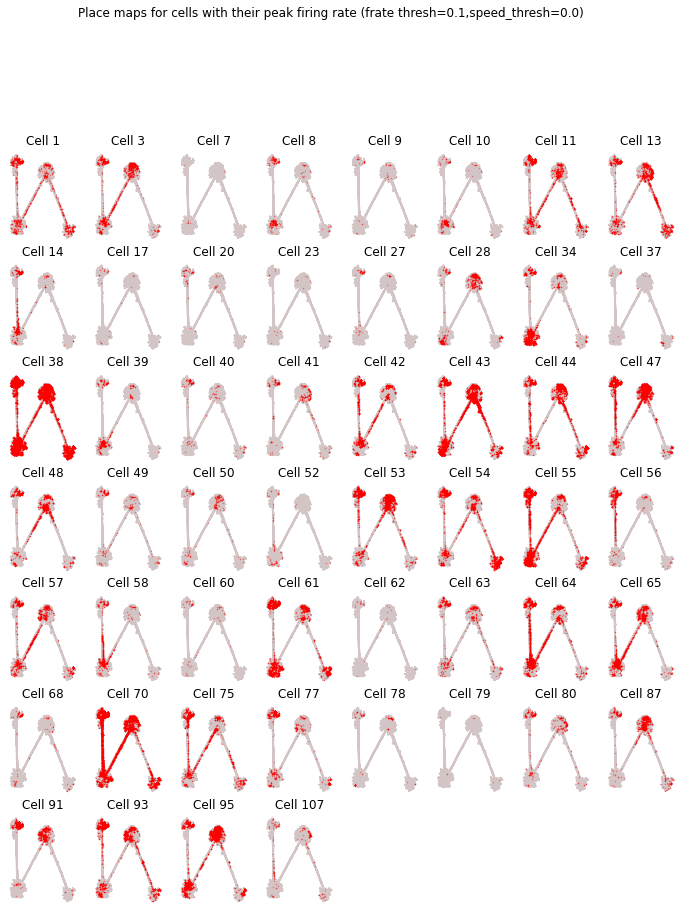

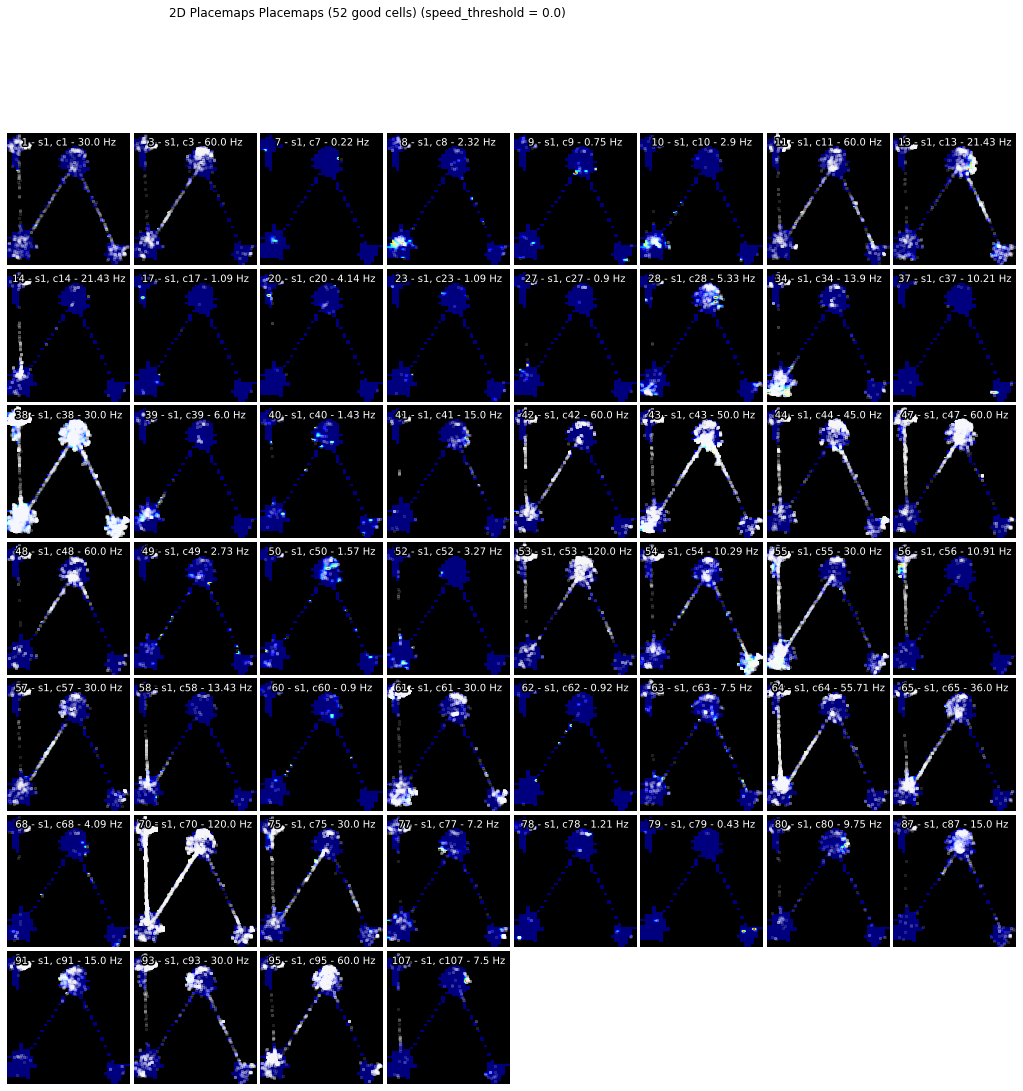

In [33]:
_display_result(curr_bapun_pipeline.computation_results['maze1'])

The specified cmap supports less colors than n_neurons (supports 7, n_neurons: 51). An extended colormap will be built.
data_aspect_ratio: (0.9803921568627451, Width_Height_Tuple(width=150.0, height=153.0))
page_grid_sizes: [RowColTuple(num_rows=7, num_columns=8)]
resolution_multiplier: 2.5, required_figure_size: (160.0, 17.5)
page_idx: 0


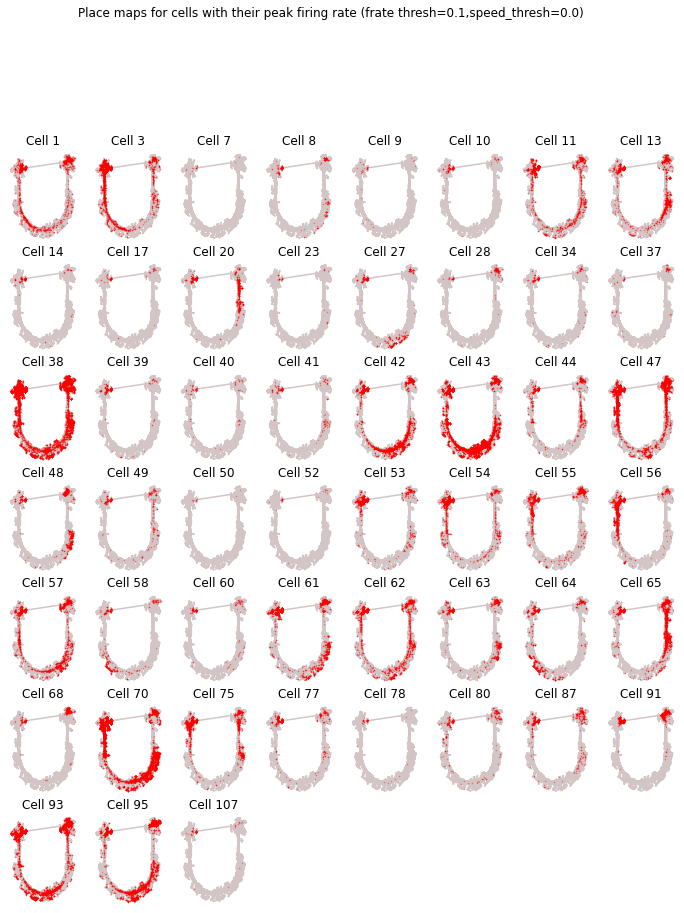

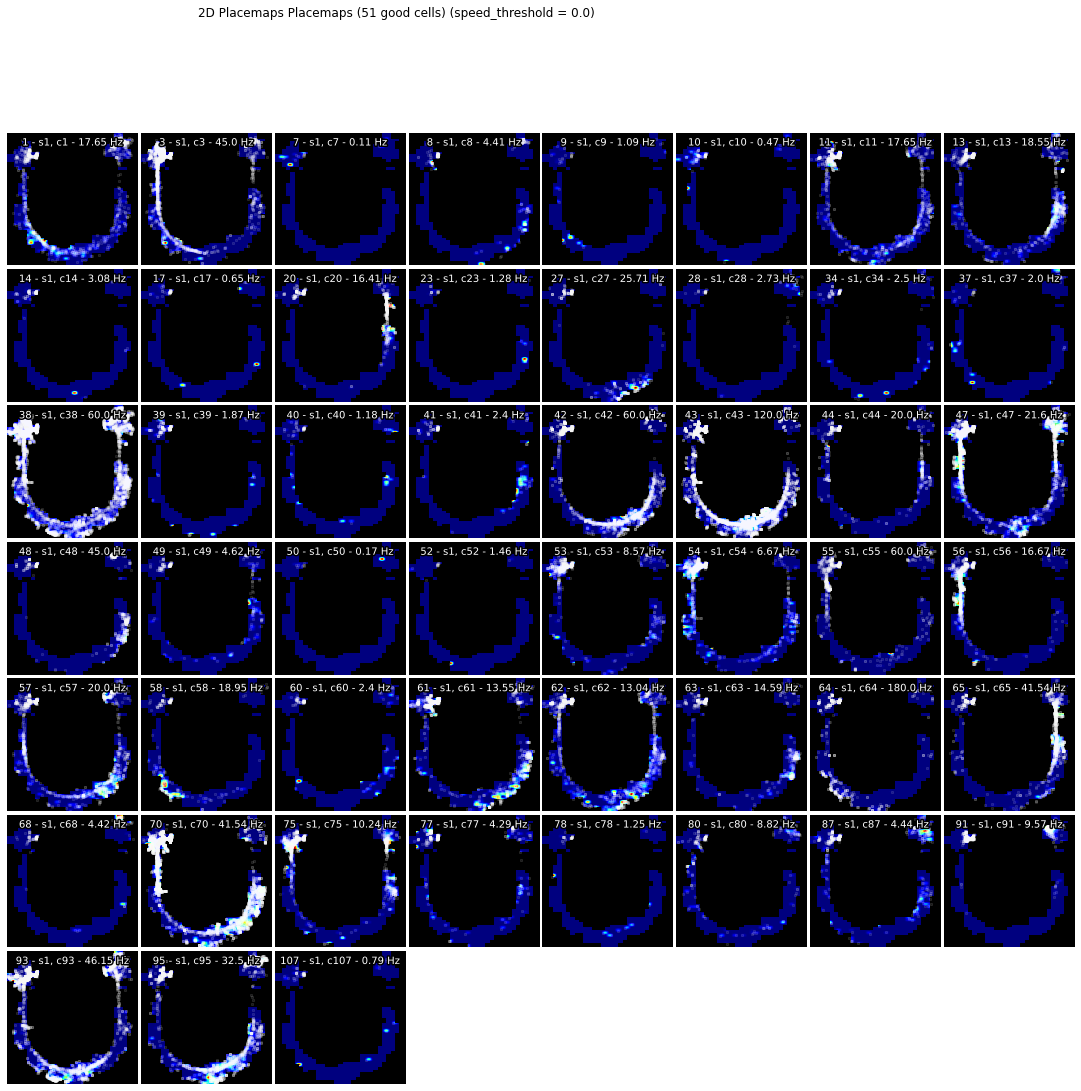

In [34]:
_display_result(curr_bapun_pipeline.computation_results['maze2'])

In [28]:
def _temp_filter_session_by_epoch1(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze1')
    ## All Spikes:
    active_session = sess.filtered_by_epoch(active_epoch) # kdiba
    # active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch

def _temp_filter_session_by_epoch2(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze2')
    ## All Spikes:
    active_session = sess.filtered_by_epoch(active_epoch) # kdiba
    # active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch()) # new Bapun/Df
    return active_session, active_epoch

active_session_filter_configurations = {'maze1':_temp_filter_session_by_epoch1,
                                        'maze2':_temp_filter_session_by_epoch2
                                       }
curr_kdiba_pipeline.filter_sessions(active_session_filter_configurations)
curr_kdiba_pipeline.perform_computations(PlacefieldComputationParameters(speed_thresh=0.0, grid_bin=(5, 3), smooth=(0.0, 0.0), frate_thresh=0.1))

Applying session filter named "maze1"...
Constraining to epoch with times (start: 0.0, end: 1739.1533641185379)
Applying session filter named "maze2"...
Constraining to epoch with times (start: 1739.1533641185379, end: 1932.4200048116618)
Performing single_computation on filtered_session with filter named "maze1"...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.
Performing single_computation on filtered_session with filter named "maze2"...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.


C:\Users\Pho\repos\NeuroPy\neuropy\utils\mixins\time_slicing.py:55: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  curr_lap_position_df_is_included = self._obj[self.time_variable_name].between(curr_slice_t_start, curr_slice_t_stop, inclusive=True) # returns a boolean array indicating inclusion


In [30]:
curr_kdiba_pipeline.computation_results['maze2']

ComputationResult(sess=DataSession(2006-6-07_11-26-53.xml), computation_config=<PlacefieldComputationParameters: {'speed_thresh': 0.0, 'grid_bin': (5, 3), 'smooth': (0.0, 0.0), 'frate_thresh': 0.1};>, computed_data={'pf1D': <PfND: {'config': <PlacefieldComputationParameters: {'speed_thresh': 0.0, 'grid_bin': (5, 3), 'smooth': (0.0, 0.0), 'frate_thresh': 0.1};>, 'position_srate': 29.969780359341755, 'ndim': 1, 't': array([1739.165056, 1739.198508, 1739.23096 , ..., 1932.327608,
       1932.359723, 1932.393032]), 'x': array([-17.72914855, -17.47004559, -16.98733468, ..., -25.42587504,
       -25.39350848, -25.376574  ]), 'speed': array([ 0.        ,  7.7652589 , 14.46673992, ...,  1.45913855,
        0.97001897,  0.50752243]), 'y': None, 'ratemap': <Ratemap: {'_filename': None, '_metadata': None, 'tuning_curves': array([], dtype=float64), 'firing_maps': array([], dtype=float64), '_neuron_ids': [], '_neuron_extended_ids': [], 'xbin': array([-26.64287598, -21.64287598, -16.64287598, -11.64

In [21]:
_display_result(curr_kdiba_pipeline.computation_results['maze2'])

# _display_result(curr_bapun_pipeline.computation_results['maze1'])

data_aspect_ratio: (7.777777777777778, Width_Height_Tuple(width=140.0, height=18.0))


ZeroDivisionError: division by zero

<Figure size 864x1440 with 0 Axes>